In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [17]:
labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Epoch 1/50
857/857 [==============================] - 4s 3ms/step - loss: 0.6812 - accuracy: 0.6838 - val_loss: 0.2159 - val_accuracy: 0.9442
Epoch 2/50
857/857 [==============================] - 2s 3ms/step - loss: 0.3348 - accuracy: 0.8658 - val_loss: 0.1671 - val_accuracy: 0.9395
Epoch 3/50
857/857 [==============================] - 2s 3ms/step - loss: 0.2549 - accuracy: 0.8938 - val_loss: 0.1579 - val_accuracy: 0.9302
Epoch 4/50
857/857 [==============================] - 2s 3ms/step - loss: 0.2504 - accuracy: 0.9113 - val_loss: 0.1148 - val_accuracy: 0.9814
Epoch 5/50
857/857 [==============================] - 2s 3ms/step - loss: 0.2083 - accuracy: 0.9195 - val_loss: 0.1534 - val_accuracy: 0.9395
Epoch 6/50
857/857 [==============================] - 2s 3ms/step - loss: 0.2341 - accuracy: 0.9113 - val_loss: 0.1115 - val_accuracy: 0.9488
Epoch 7/50
857/857 [==============================] - 2s 3ms/step - loss: 0.2054 - accuracy: 0.9172 - val_loss: 0.0824 - val_accuracy: 0.9767
Epoch 

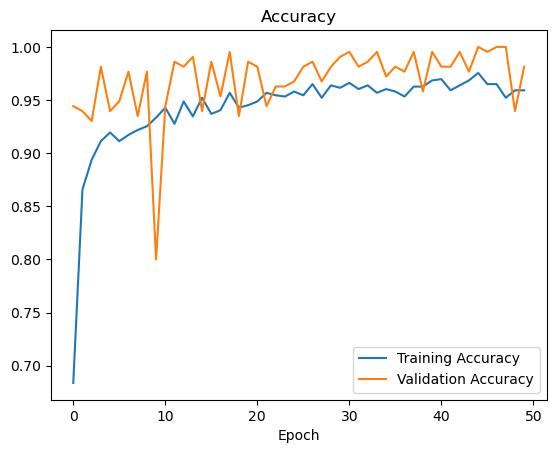

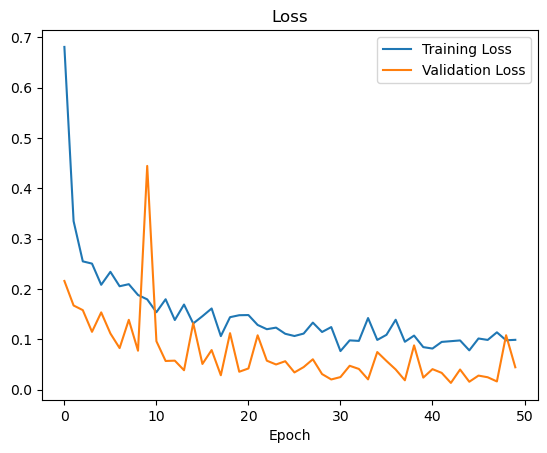

In [10]:
# Load landmark data from CSV
df = pd.read_csv('up-down-bad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels = tf.keras.utils.to_categorical(labels, num_classes=3)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 50

# Create a model for landmark-based classification
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data splitting (you may need to adjust this based on your dataset)
from sklearn.model_selection import train_test_split
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(landmarks, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))



# Evaluate the model
accuracy = model.evaluate(landmarks_test, labels_test)
print(f'Test Accuracy: {accuracy[1]}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


# 2

Epoch 1/50
429/429 [==============================] - 2s 3ms/step - loss: 0.7477 - accuracy: 0.6348 - val_loss: 0.2427 - val_accuracy: 0.9395
Epoch 2/50
429/429 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8588 - val_loss: 0.2094 - val_accuracy: 0.9256
Epoch 3/50
429/429 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.8950 - val_loss: 0.1427 - val_accuracy: 0.9442
Epoch 4/50
429/429 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.9253 - val_loss: 0.1697 - val_accuracy: 0.9442
Epoch 5/50
429/429 [==============================] - 1s 3ms/step - loss: 0.2152 - accuracy: 0.9148 - val_loss: 0.1353 - val_accuracy: 0.9395
Epoch 6/50
429/429 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9195 - val_loss: 0.0963 - val_accuracy: 0.9442
Epoch 7/50
429/429 [==============================] - 1s 3ms/step - loss: 0.1939 - accuracy: 0.9265 - val_loss: 0.0830 - val_accuracy: 0.9488
Epoch 

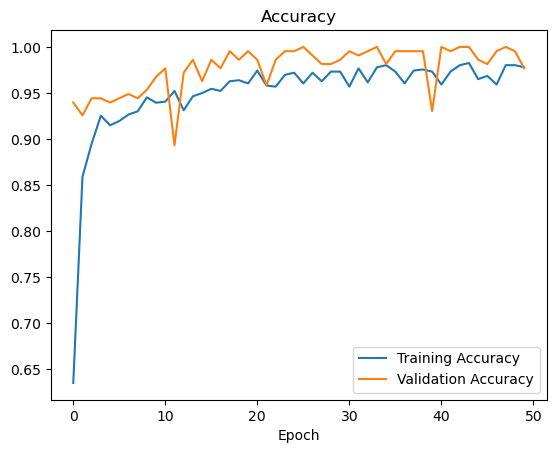

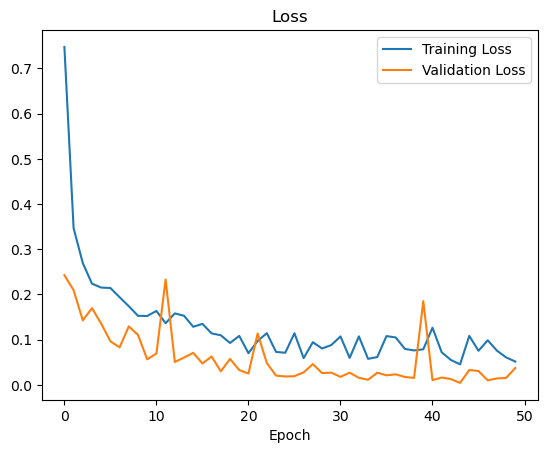

In [11]:
# Load landmark data from CSV
df = pd.read_csv('up-down-bad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels = tf.keras.utils.to_categorical(labels, num_classes=3)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 2
epochs = 50

# Create a model for landmark-based classification
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data splitting (you may need to adjust this based on your dataset)
from sklearn.model_selection import train_test_split
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(landmarks, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))



# Evaluate the model
accuracy = model.evaluate(landmarks_test, labels_test)
print(f'Test Accuracy: {accuracy[1]}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


# 10

Epoch 1/50
86/86 [==============================] - 2s 7ms/step - loss: 0.9050 - accuracy: 0.5858 - val_loss: 0.4560 - val_accuracy: 0.9302
Epoch 2/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.8366 - val_loss: 0.2171 - val_accuracy: 0.9395
Epoch 3/50
86/86 [==============================] - 0s 4ms/step - loss: 0.2811 - accuracy: 0.9090 - val_loss: 0.1499 - val_accuracy: 0.9442
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 0.2196 - accuracy: 0.9335 - val_loss: 0.1211 - val_accuracy: 0.9628
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.9323 - val_loss: 0.1092 - val_accuracy: 0.9488
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 0.1768 - accuracy: 0.9382 - val_loss: 0.0967 - val_accuracy: 0.9814
Epoch 7/50
86/86 [==============================] - 0s 5ms/step - loss: 0.1495 - accuracy: 0.9475 - val_loss: 0.0757 - val_accuracy: 0.9628
Epoch 8/50
86/86 [==

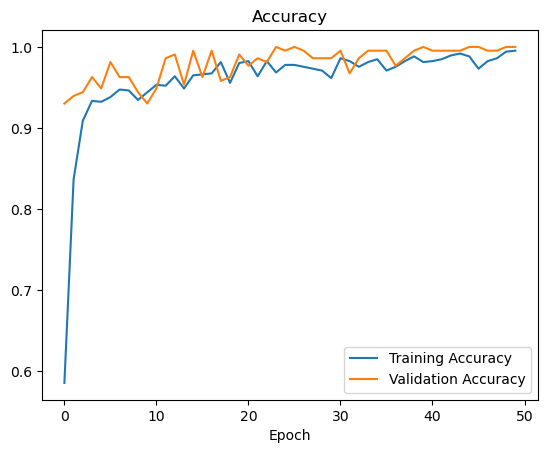

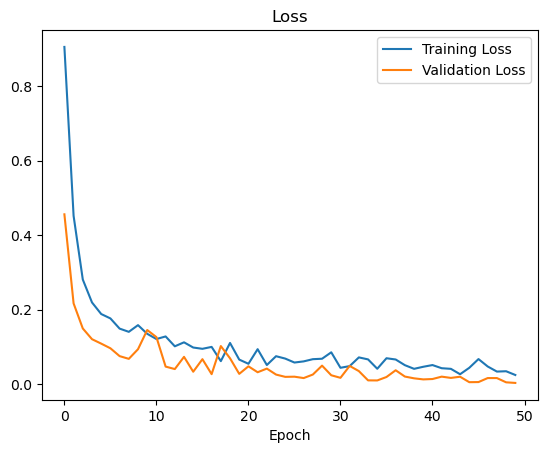

In [12]:
# Load landmark data from CSV
df = pd.read_csv('up-down-bad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels = tf.keras.utils.to_categorical(labels, num_classes=3)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 10
epochs = 50

# Create a model for landmark-based classification
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data splitting (you may need to adjust this based on your dataset)
from sklearn.model_selection import train_test_split
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(landmarks, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))



# Evaluate the model
accuracy = model.evaluate(landmarks_test, labels_test)
print(f'Test Accuracy: {accuracy[1]}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


# 50

Epoch 1/50
18/18 [==============================] - 1s 17ms/step - loss: 1.0157 - accuracy: 0.4889 - val_loss: 0.7571 - val_accuracy: 0.8930
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.7549 - accuracy: 0.6943 - val_loss: 0.4777 - val_accuracy: 0.9209
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5120 - accuracy: 0.8296 - val_loss: 0.2963 - val_accuracy: 0.9349
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.8693 - val_loss: 0.2261 - val_accuracy: 0.9442
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.2955 - accuracy: 0.8891 - val_loss: 0.1699 - val_accuracy: 0.9395
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.9043 - val_loss: 0.1523 - val_accuracy: 0.9442
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.9183 - val_loss: 0.1373 - val_accuracy: 0.9442
Epoch 8/50
18/18 [=

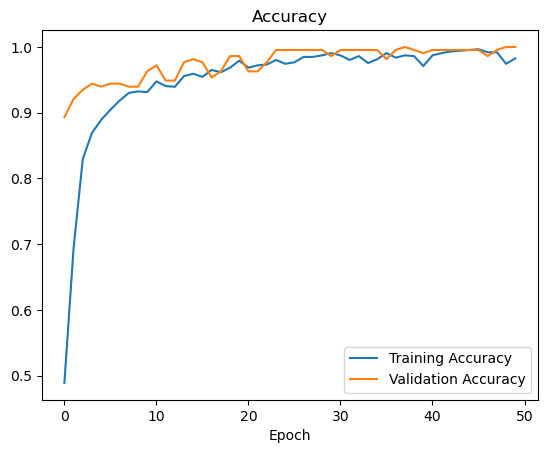

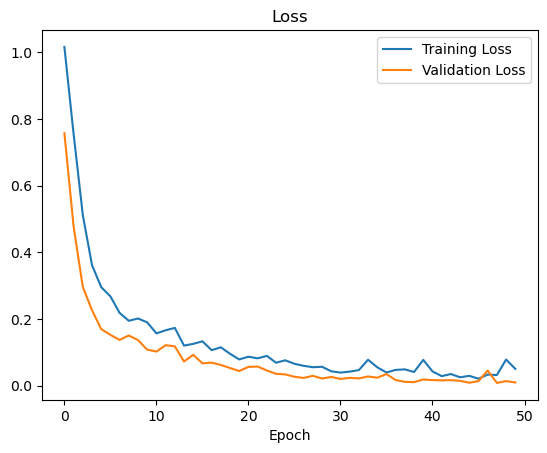

In [13]:
# Load landmark data from CSV
df = pd.read_csv('up-down-bad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels = tf.keras.utils.to_categorical(labels, num_classes=3)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 50
epochs = 50

# Create a model for landmark-based classification
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data splitting (you may need to adjust this based on your dataset)
from sklearn.model_selection import train_test_split
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(landmarks, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))



# Evaluate the model
accuracy = model.evaluate(landmarks_test, labels_test)
print(f'Test Accuracy: {accuracy[1]}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


# 100

Epoch 1/50
9/9 [==============================] - 1s 35ms/step - loss: 1.0781 - accuracy: 0.4492 - val_loss: 0.8747 - val_accuracy: 0.8233
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.9081 - accuracy: 0.5986 - val_loss: 0.7042 - val_accuracy: 0.8186
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.7455 - accuracy: 0.7235 - val_loss: 0.5090 - val_accuracy: 0.9023
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5799 - accuracy: 0.8156 - val_loss: 0.3788 - val_accuracy: 0.9349
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.4564 - accuracy: 0.8646 - val_loss: 0.2918 - val_accuracy: 0.9209
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3582 - accuracy: 0.8775 - val_loss: 0.2274 - val_accuracy: 0.9395
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3076 - accuracy: 0.8996 - val_loss: 0.1907 - val_accuracy: 0.9395
Epoch 8/50
9/9 [============

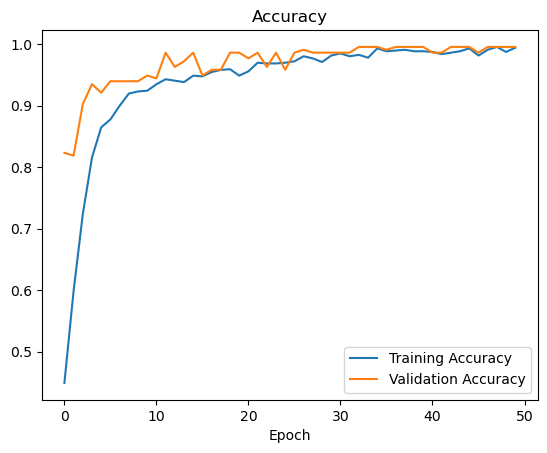

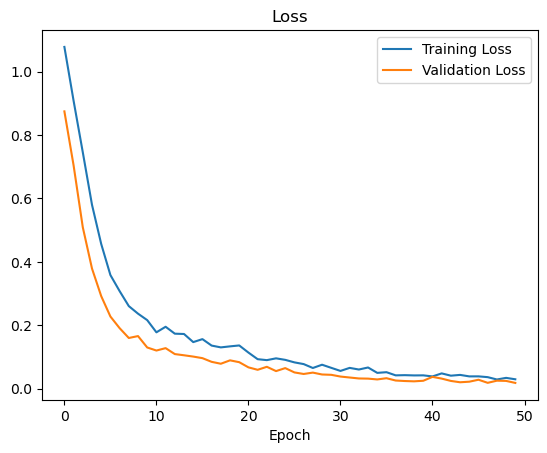

In [14]:
# Load landmark data from CSV
df = pd.read_csv('up-down-bad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels = tf.keras.utils.to_categorical(labels, num_classes=3)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 100
epochs = 50

# Create a model for landmark-based classification
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data splitting (you may need to adjust this based on your dataset)
from sklearn.model_selection import train_test_split
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(landmarks, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))



# Evaluate the model
accuracy = model.evaluate(landmarks_test, labels_test)
print(f'Test Accuracy: {accuracy[1]}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


# Save the model

In [16]:
model.save('up_down_downbad_model.keras')